
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [4]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [5]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

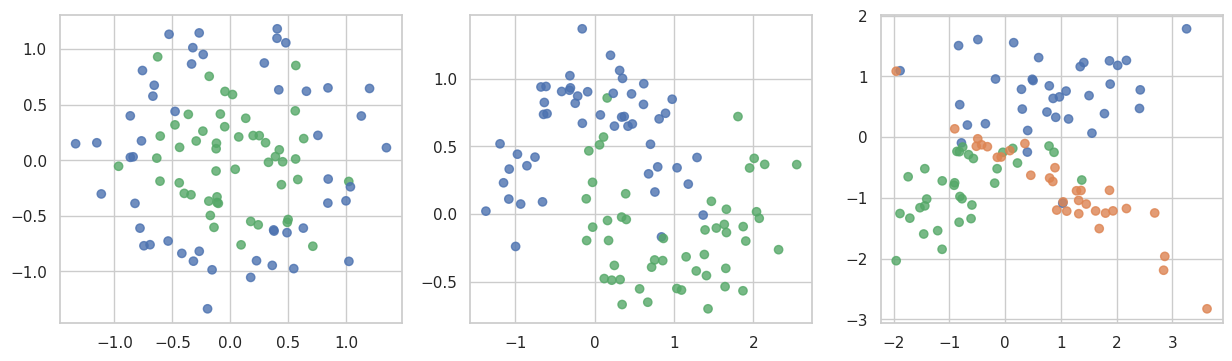

In [6]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [7]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

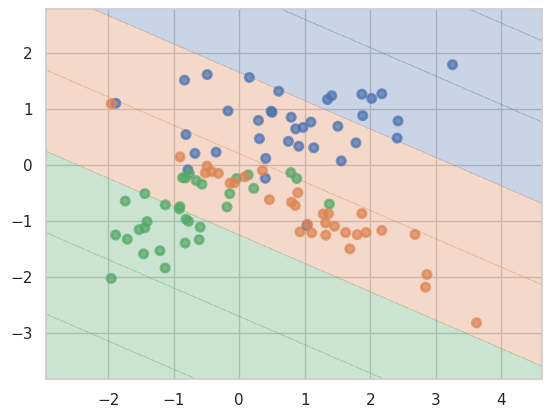

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Metric:  0.75


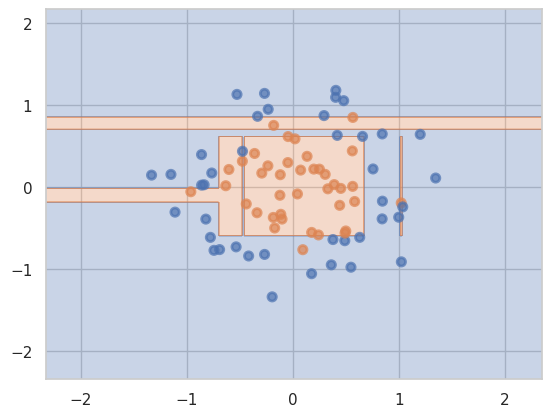

Metric:  0.95


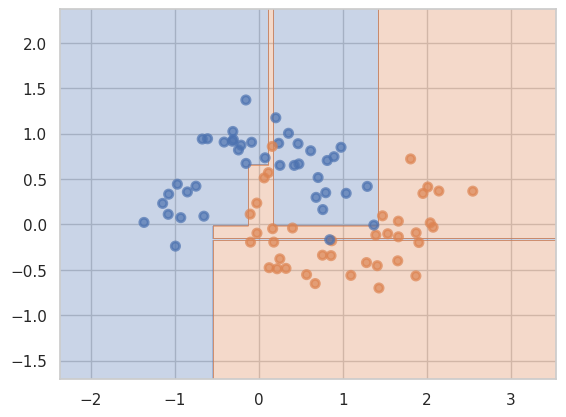

Metric:  0.65


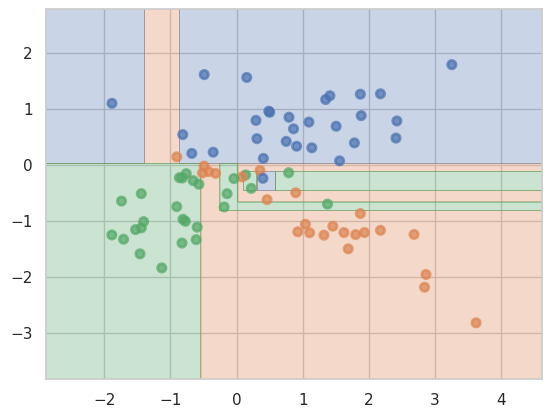

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

random_state = 322

for X, y in datasets:
    tree = DecisionTreeClassifier(random_state=random_state)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    tree.fit(X_train, y_train)
    print("Metric: ", accuracy_score(y_test, tree.predict(X_test)))
    plot_surface(tree, X_train, y_train)
    plt.show()

__Ответ:__ <br>
Результаты в целом неплохие, но есть проблемные места, узкие полоски, которые могут свидетельствовать о переобучении. Но так как данные в целом хорошие, поэтому и модель в целом хорошая

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Best params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'splitter': 'best'}
Train accuracy: 0.963
Test accuracy: 0.750


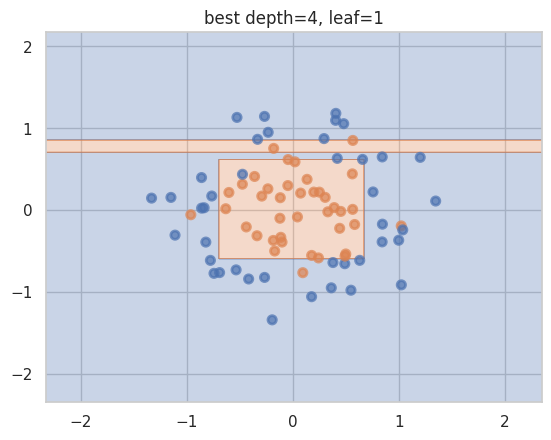

Best params: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'splitter': 'best'}
Train accuracy: 1.000
Test accuracy: 0.950


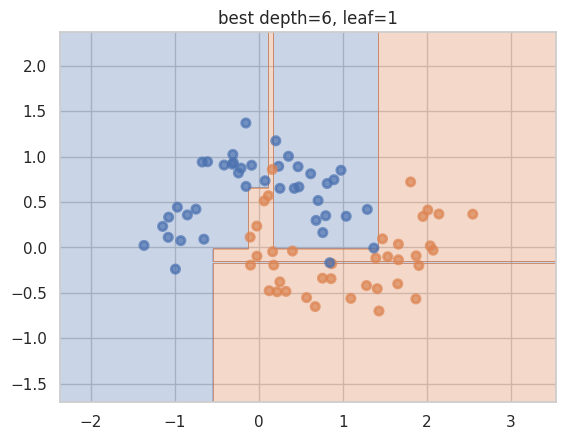

Best params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'splitter': 'best'}
Train accuracy: 0.887
Test accuracy: 0.800


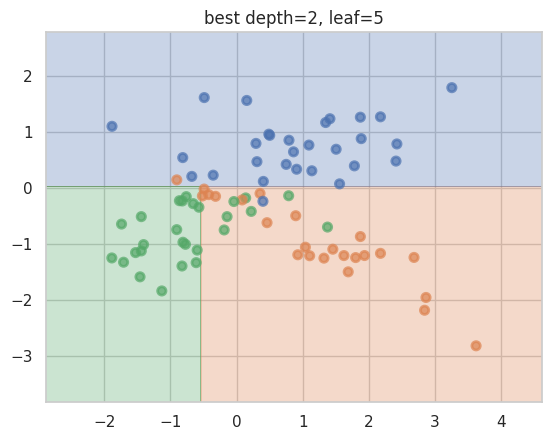

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 4, 6, 8, 10,],
    'min_samples_leaf': [1, 5, 10, 15,],
    'criterion': ['gini', 'entropy', 'log_loss',],
    'splitter': ['best', 'random',]
}

for X, y in datasets:
    tree = DecisionTreeClassifier(random_state=random_state)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    tree = DecisionTreeClassifier(random_state=random_state)

    grid_search = GridSearchCV(
        estimator=tree,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_tree = grid_search.best_estimator_

    print(f"Best params: {grid_search.best_params_}")
    print(f"Train accuracy: {accuracy_score(y_train, best_tree.predict(X_train)):.3f}")
    print(f"Test accuracy: {accuracy_score(y_test, best_tree.predict(X_test)):.3f}")

    plot_surface(best_tree, X_train, y_train)
    plt.title(f"best depth={grid_search.best_params_['max_depth']}, "
              f"leaf={grid_search.best_params_['min_samples_leaf']}")
    plt.show()

__Ответ:__ 

После кросс валидации, полосок стало меньше, но они не везде пропали. В целом картина стала лучше, модели лучше обобщают данные.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

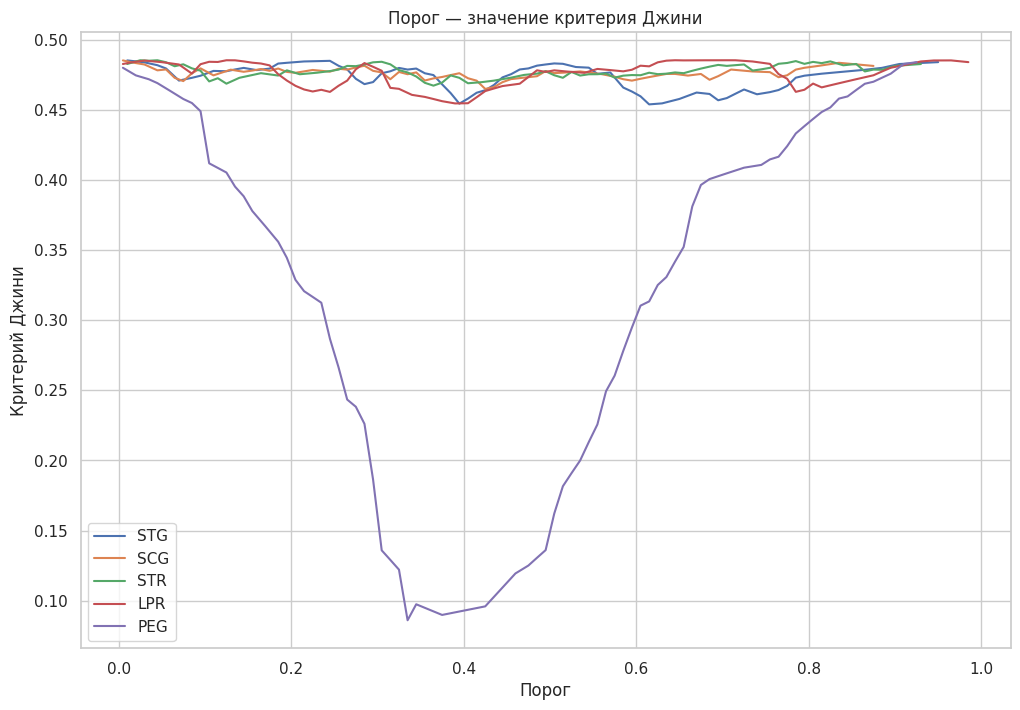

In [24]:
from tree_code import find_best_split

df = pd.read_csv("students.csv")
X = df.drop(columns="UNS").values
y = df["UNS"].values
feature_names = df.columns[:-1]

plt.figure(figsize=(12, 8), dpi=100)

for i in range(X.shape[1]):
    thresholds, ginis, _, _ = find_best_split(X[:, i], y)
    plt.plot(thresholds, ginis, label=feature_names[i])

plt.title("Порог — значение критерия Джини")
plt.xlabel("Порог")
plt.ylabel("Критерий Джини")
plt.legend()
plt.grid(True)
plt.show()

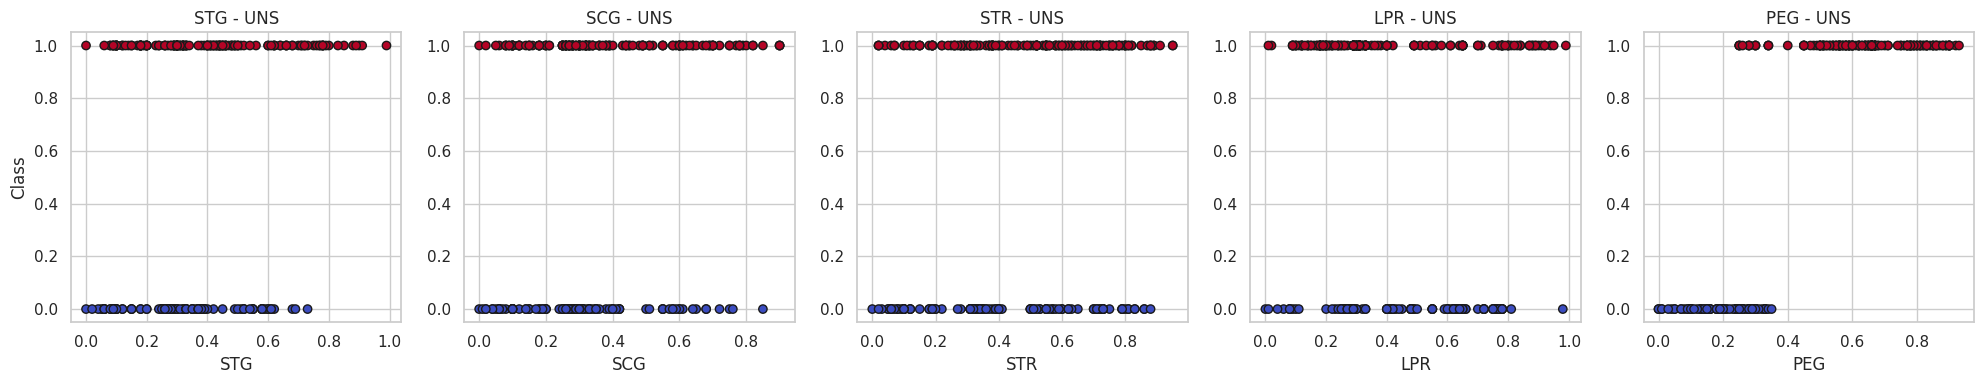

In [29]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(X.shape[1]):
    axes[i].scatter(X[:, i], y, c=y, cmap="coolwarm", edgecolor="k")
    axes[i].set_title(f"{feature_names[i]} - UNS")
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_ylim(-0.05, 1.05)
    if i == 0:
        axes[i].set_ylabel("Class")

plt.tight_layout()
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** Признак достойные разделения - PEG, что отчетливо считывается визуально.

Кривая Джини для хорошоразделимых признаков имеет параболический вид с четковыраженным минимумом, это указывает на существование порога, у плохих она плоская. Это соответсвует тому, что мы видели на предыдущем графике.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




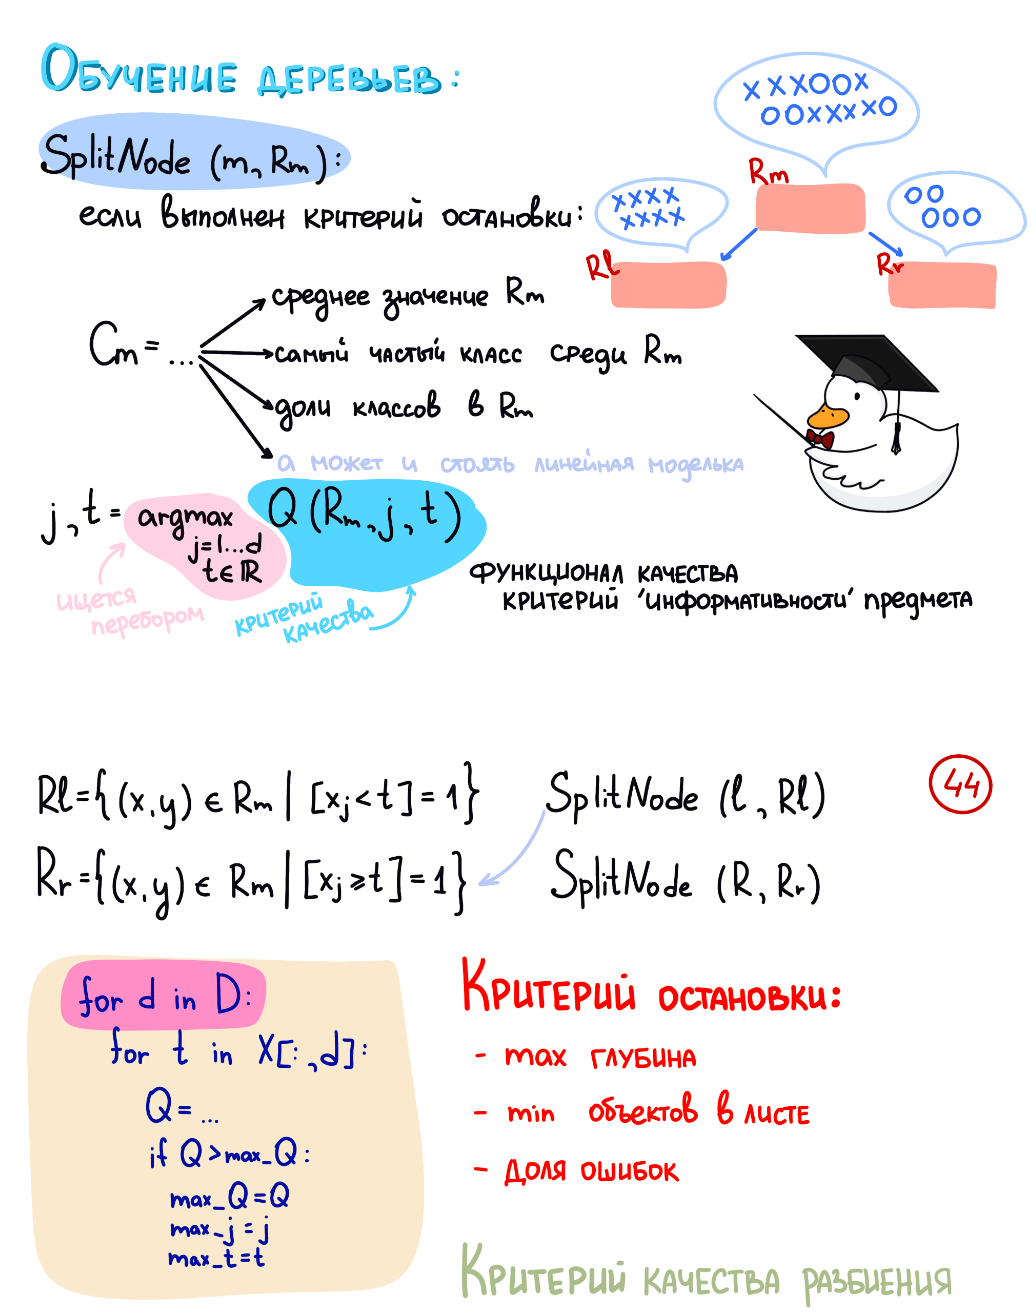

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tree_code import DecisionTree


columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv("agaricus-lepiota.data", header=None, names=columns)
y = (df["class"] == 'p').astype(int).values  # 1 = ядовитый, 0 = съедобный
X_raw = df.drop("class", axis=1)
X = np.zeros_like(X_raw, dtype=int)

encoders = []

for i, col in enumerate(X_raw.columns):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X_raw[col])
    encoders.append(le)

feature_types = ["categorical"] * X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state, stratify=y
)

tree = DecisionTree(feature_types=feature_types, max_depth=5)
tree.fit(X_train, y_train)

preds = tree.predict(X_test)
acc = accuracy_score(y_test, preds)

print(f"Точность модели на тесте: {acc:.4f}")

Точность модели на тесте: 0.9994


почти единица...неглубокое...ок

__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [44]:
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

In [45]:
# кодирование признаков
def encode_features(X):
    for i in range(X.shape[1]):
        le = LabelEncoder()
        X[:, i] = le.fit_transform(X[:, i])
    return X.astype(int)

In [53]:
def load_dataset(filepath: str, column_names: list, label_column: str, label_encoder_fn) -> tuple:
    """Универсальный загрузчик датасета с предварительной очисткой и кодированием меток."""
    df = pd.read_csv(filepath, header=None, names=column_names)
    df.replace('?', np.nan, inplace=True)
    df.dropna(inplace=True)

    X = encode_features(df.drop(columns=[label_column]).values)
    y = df[label_column].apply(label_encoder_fn).values
    return X, y


# --- Функции кодирования меток для каждого датасета --- #
def encode_mushroom_label(label: str) -> int:
    return 0 if label == "e" else 1

def encode_tic_tac_toe_label(label: str) -> int:
    return 1 if label == "positive" else 0

def encode_car_label(label: str) -> int:
    return 0 if label in {"unacc", "acc"} else 1

def encode_nursery_label(label: str) -> int:
    return 0 if label in {"not_recom", "recommend"} else 1


# --- Специализированные загрузчики --- #
def load_mushrooms():
    return load_dataset(
        "agaricus-lepiota.data",
        [
            'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
            'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
            'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
            'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
        ],
        label_column="class",
        label_encoder_fn=encode_mushroom_label
    )


def load_tic_tac_toe():
    return load_dataset(
        "tic-tac-toe-endgame.csv",
        [
            'top-left', 'top-middle', 'top-right',
            'middle-left', 'middle-middle', 'middle-right',
            'bottom-left', 'bottom-middle', 'bottom-right',
            'Class'
        ],
        label_column="Class",
        label_encoder_fn=encode_tic_tac_toe_label
    )


def load_car():
    return load_dataset(
        "car.data",
        ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'],
        label_column="class",
        label_encoder_fn=encode_car_label
    )


def load_nursery():
    return load_dataset(
        "nursery.data",
        ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class'],
        label_column="class",
        label_encoder_fn=encode_nursery_label
    )


In [58]:
def evaluate_model(model, X, y):
    scorer = make_scorer(accuracy_score)
    try:
        scores = cross_val_score(model, X, y, cv=10, scoring=scorer)
        return scores.mean()
    except Exception as error:
        print(f"Ошибка при оценке модели: {error}")
        return np.nan


def find_best_split(feature_values, target_values):
    assert len(feature_values) == len(target_values)

    sorted_indices = np.argsort(feature_values)
    feature_sorted = feature_values[sorted_indices]
    target_sorted = target_values[sorted_indices]

    split_candidates = np.where(feature_sorted[:-1] != feature_sorted[1:])[0]
    if len(split_candidates) == 0:
        return None, None, None, -np.inf

    thresholds = (feature_sorted[split_candidates] + feature_sorted[split_candidates + 1]) / 2
    gini_scores = []

    total_count = len(target_sorted)

    for threshold in thresholds:
        left_mask = feature_sorted < threshold
        right_mask = ~left_mask

        left_count = left_mask.sum()
        right_count = right_mask.sum()

        if left_count == 0 or right_count == 0:
            gini_scores.append(-np.inf)
            continue

        p_left = target_sorted[left_mask].mean()
        impurity_left = 1 - p_left**2 - (1 - p_left)**2

        p_right = target_sorted[right_mask].mean()
        impurity_right = 1 - p_right**2 - (1 - p_right)**2

        gini = -(left_count / total_count) * impurity_left - (right_count / total_count) * impurity_right
        gini_scores.append(gini)

    gini_scores = np.array(gini_scores)
    best_index = np.argmax(gini_scores)

    return thresholds, gini_scores, thresholds[best_index], gini_scores[best_index]

In [62]:
class DecisionTreeClassifierWrapper(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=2):
        self._tree = DecisionTree(feature_types, max_depth, min_samples_split)

    def fit(self, X, y):
        self._tree.fit(X, y)
        return self

    def predict(self, X):
        return self._tree.predict(X)

    def get_params(self, deep=True):
        return {
            "feature_types": self._tree._feature_types,
            "max_depth": self._tree._max_depth,
            "min_samples_split": self._tree._min_samples_split
        }

    def set_params(self, **params):
        for name, value in params.items():
            setattr(self._tree, f"_{name}", value)
        return self


In [66]:
dataset_loaders = {
    "Nursery": load_nursery(),
    "Mushrooms": load_mushrooms(),
    "Car Evaluation": load_car(),
    "Tic-Tac-Toe": load_tic_tac_toe(),
}

evaluation_results = []

for dataset_name, (X, y) in dataset_loaders.items():
    print(f"\nОценка датасета: {dataset_name}")
    num_features = X.shape[1]

    model_variants = {
        "CustomTree_Real": DecisionTreeClassifierWrapper(["real"] * num_features),
        "CustomTree_Categorical": DecisionTreeClassifierWrapper(["categorical"] * num_features),
        "CustomTree_OneHot": Pipeline([
            ('onehot_encoder', ColumnTransformer([
                ('onehot', OneHotEncoder(sparse_output=False), list(range(num_features)))
            ])),
            ('sklearn_tree', DecisionTreeClassifier())
        ]),
        "SklearnTree": DecisionTreeClassifier()
    }

    scores_row = {"Dataset": dataset_name}
    for model_label, model_instance in model_variants.items():
        scores_row[model_label] = evaluate_model(model_instance, X, y)

    evaluation_results.append(scores_row)

results_df = pd.DataFrame(evaluation_results).set_index("Dataset")

custom_tree_scores = results_df[["CustomTree_Real", "CustomTree_Categorical"]]
reference_tree_scores = results_df[["CustomTree_OneHot", "SklearnTree"]]



Оценка датасета: Nursery

Оценка датасета: Mushrooms

Оценка датасета: Car Evaluation

Оценка датасета: Tic-Tac-Toe


In [67]:
df_rounded = df.copy().round(4)

# Переименуем index в колонку 'Dataset' (если надо явно)
df_rounded.reset_index(inplace=True)

print("\nAccuracy Results:\n")
print(df_rounded.to_string(index=False))



Accuracy Results:

       Dataset  Custom Tree (Real)  Custom Tree (Categorical)  Custom Tree + OneHot  Sklearn Tree
     Mushrooms              0.9851                     0.9915                   NaN        0.9766
   Tic-Tac-Toe              0.4783                     0.5898                   NaN        0.7364
Car Evaluation              0.9427                     0.9641                0.8336        0.9427
       Nursery              0.9996                     0.9998                0.9998        0.9997


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


# Как дела?

я устал, я мухожук

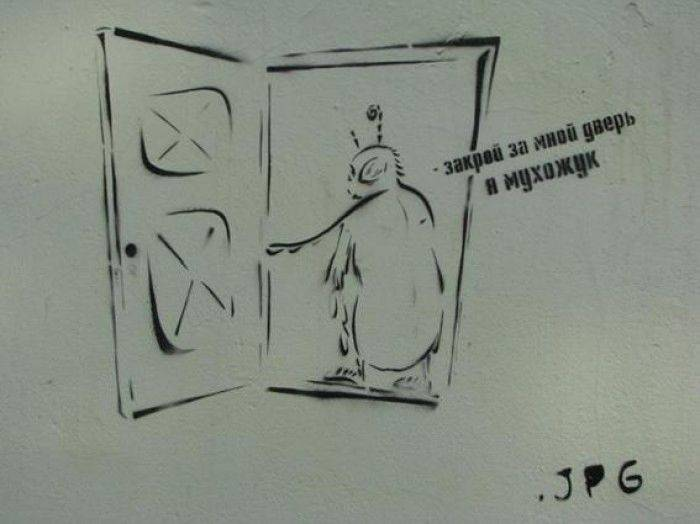